In [97]:
import os
import json
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from operator import is_not
from functools import partial
import math
import re
#load our cutomized data load module
import loaddata

%matplotlib inline

In [17]:
#this code read files under two folder and merge them together into one data frame
#1 Read mojo files
mojo_data = loaddata.load_mojo_data()
mojo_df = pd.DataFrame(mojo_data)
mojo_df['title_clean'] = mojo_df['title'].str.replace('[^\w]','').str.lower()
#2 Read meta files
meta_data = loaddata.load_metacritic_data()
meta_df = pd.DataFrame(meta_data)
meta_df['title_clean'] = meta_df['title'].str.replace('[^\w]','').str.lower()
#3 Merge two file together
df_merged = pd.merge(mojo_df, 
                     meta_df,
                     on=['title_clean','year'],
                     how = 'left')
# check the final data frame
df_merged.head()

Parsed 3728 movies from 3728 files
Parsed 4765 metacritic files from 4767 files


,alt_title,director_x,domestic_gross,mojo_slug,opening_per_theater,opening_weekend_take,production_budget,release_date_limited,release_date_wide,title_x,...,num_critic_reviews,num_user_ratings,num_user_reviews,rating,release_date,runtime_minutes,studio,title_y,unable to retrieve,user_score
0,"10,000 B.C. (2008)",Roland Emmerich,94784201.0,10000bc,10518.0,35867488.0,105000000.0,None,2008-03-07,"10,000 B.C.",...,"4, 8, 17, 29",273.0,"50, 18, 60, 128",PG-13,2008-03-07,109.0,Warner Bros. Pictures,"10,000 BC",NaN,4.6
1,102 Dalmatians (2000),None,66957026.0,102dalmatians,7353.0,19883351.0,85000000.0,None,2000-11-22,102 Dalmatians,...,"7, 5, 12, 24",47.0,"7, 3, 3, 13",G,2000-11-22,100.0,Buena Vista Pictures,102 Dalmatians,NaN,5.3
2,10 Things I Hate About You (1999),None,38178166.0,10thingsihateaboutyou,3668.0,8330681.0,30000000.0,None,1999-03-31,10 Things I Hate About You,...,"18, 7, 1, 26",175.0,"27, 1, 1, 29",PG-13,1999-03-31,97.0,Buena Vista Pictures,10 Things I Hate About You,NaN,7
3,10 Years (2012),Jamie Linden,203373.0,10years,7569.0,22707.0,NaN,None,2012-09-14,10 Years,...,"7, 11, 0, 18",12.0,"3, 2, 1, 6",R,2012-09-14,100.0,Anchor Bay Entertainment,10 Years,NaN,6.6
4,11 Flowers (2013),None,9213.0,11flowers,1758.0,3516.0,NaN,None,2013-02-22,11 Flowers,...,"4, 3, 0, 7",NaN,"1, 0, 0, 1",Not Rated,2013-02-22,110.0,First Run Features,11 Flowers,NaN,tbd


In [18]:
list(df_merged.columns.values)

[u'alt_title',
 u'director_x',
 u'domestic_gross',
 u'mojo_slug',
 u'opening_per_theater',
 u'opening_weekend_take',
 u'production_budget',
 u'release_date_limited',
 u'release_date_wide',
 u'title_x',
 u'widest_release',
 u'worldwide_gross',
 u'year',
 'title_clean',
 u'complete',
 u'director_y',
 u'genre',
 u'metacritic_page',
 u'metascore',
 u'num_critic_reviews',
 u'num_user_ratings',
 u'num_user_reviews',
 u'rating',
 u'release_date',
 u'runtime_minutes',
 u'studio',
 u'title_y',
 u'unable to retrieve',
 u'user_score']

In [143]:
df_merged['international_gross'] = df_merged.worldwide_gross - df_merged.domestic_gross
df_merged['domestic_ROI'] = (df_merged.domestic_gross - df_merged.production_budget) / df_merged.production_budget
df_merged['international_ROI'] = (df_merged.international_gross - df_merged.production_budget) / df_merged.production_budget
df_merged['worldwide_ROI'] = (df_merged.worldwide_gross - df_merged.production_budget) / df_merged.production_budget
df_merged['gross_rt'] = df_merged.domestic_gross / df_merged.worldwide_gross

df_merged['hurdle'] = np.where(df_merged['worldwide_ROI'] >= 0.1, 'True', 'False')
#df_merged['hurdle'] = df_merged['hurdle'].astype(bool)
df_recent = df_merged[df_merged['year']>=1988]
df_recent.describe()

,domestic_gross,opening_per_theater,opening_weekend_take,production_budget,widest_release,worldwide_gross,year,metascore,num_user_ratings,runtime_minutes,international_gross,domestic_ROI,international_ROI,worldwide_ROI,gross_rt
count,3.467000e+03,3406.000000,3.406000e+03,1.552000e+03,3449.000000,2.775000e+03,3513.000000,3155.000000,3091.000000,3178.000000,2.767000e+03,1550.000000,1451.000000,1452.000000,2767.000000
mean,3.515407e+07,7732.735467,9.116982e+06,4.672912e+07,1374.975645,9.030155e+07,2006.263023,57.259271,123.605306,107.205790,4.855564e+07,9.354591,6.228771,17.084399,0.557756
std,5.647958e+07,8155.260644,1.426801e+07,4.071684e+07,1312.245285,1.485506e+08,6.397807,18.022514,221.464583,19.297771,9.413737e+07,203.936347,156.832540,362.188010,0.296297
min,7.200000e+01,72.000000,7.200000e+01,2.200000e+02,1.000000,7.200000e+01,1988.000000,1.000000,4.000000,60.000000,0.000000e+00,-0.999926,-1.000000,-0.998543,0.000290
25%,NaN,NaN,NaN,NaN,NaN,NaN,2002.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,7.605076e+08,204230.000000,1.741446e+08,2.150000e+08,4468.000000,2.787965e+09,2015.000000,100.000000,4002.000000,325.000000,2.027457e+09,7193.587333,5694.799333,12889.386667,1.000000


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 28 Text xticklabel objects>)

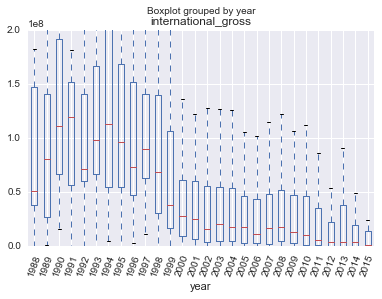

In [77]:
# lm = sns.boxplot(x="year", y="international_gross",data=df_recent)
# axes = lm.axes
# axes.set_ylim(0,200000000)

df_recent.year  = df_recent.year.astype(int)
df_recent.boxplot(column="international_gross",by='year')
plt.ylim((0,2e8))
plt.xticks(rotation=70)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 28 Text xticklabel objects>)

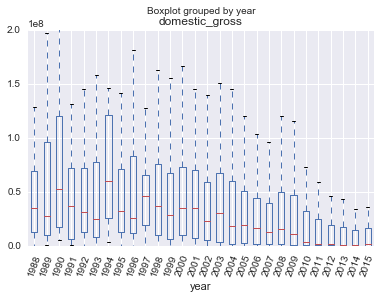

In [157]:
# lm = sns.boxplot(x="year", y="domestic_gross",data=df_recent)
# axes = lm.axes
# axes.set_ylim(0,200000000)

df_recent.year  = df_recent.year.astype(int)
df_recent.boxplot(column="domestic_gross",by='year')
plt.ylim((0,2e8))
plt.xticks(rotation=70)

In [158]:
df_recent2 = df_merged[df_merged['year']>=2000]
df_recent2.describe()

,domestic_gross,opening_per_theater,opening_weekend_take,production_budget,widest_release,worldwide_gross,year,metascore,num_user_ratings,runtime_minutes,international_gross,domestic_ROI,international_ROI,worldwide_ROI,gross_rt
count,2.895000e+03,2852.000000,2.852000e+03,1.297000e+03,2888.000000,2.483000e+03,2941.000000,2668.000000,2608.000000,2692.000000,2.475000e+03,1295.000000,1270.000000,1271.000000,2475.000000
mean,3.114775e+07,7731.434081,8.880954e+06,4.662982e+07,1335.515582,7.768431e+07,2008.427406,56.717766,129.701687,105.826895,4.164173e+07,8.987919,5.357426,15.518285,0.559927
std,5.329755e+07,8510.650318,1.487392e+07,4.133307e+07,1367.902606,1.361389e+08,4.220284,17.964934,233.264633,18.392530,8.665736e+07,213.449431,159.871629,369.376859,0.305807
min,7.200000e+01,72.000000,7.200000e+01,2.200000e+02,1.000000,7.200000e+01,2000.000000,1.000000,4.000000,60.000000,0.000000e+00,-0.999926,-1.000000,-0.998543,0.000290
25%,NaN,NaN,NaN,NaN,NaN,NaN,2005.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2009.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,7.605076e+08,204230.000000,1.741446e+08,2.150000e+08,4468.000000,2.787965e+09,2015.000000,100.000000,4002.000000,325.000000,2.027457e+09,7193.587333,5694.799333,12889.386667,1.000000


In [83]:
df_cell = df_recent2[["domestic_gross","metascore","international_gross","domestic_ROI","worldwide_ROI","production_budget","hurdle"]]
df_cell = df_cell.dropna()
df_cell.describe()

# x = df_cell.domestic_gross
# y = df_cell.international_gross
#sizes = df_cell.worldwide_margin

#g = sns.distplot(sizes);

# plt.scatter(x, y, c=sizes, marker='o')
# plt.show()

,domestic_gross,metascore,international_gross,domestic_ROI,worldwide_ROI,production_budget
count,1.215000e+03,1215.000000,1.215000e+03,1215.000000,1215.000000,1.215000e+03
mean,6.193449e+07,53.647737,6.882513e+07,9.555202,16.130857,4.807423e+07
std,6.360943e+07,17.644373,9.537995e+07,220.357787,377.787104,4.181683e+07
min,1.747900e+04,9.000000,0.000000e+00,-0.998543,-0.998543,2.200000e+02
25%,1.862102e+07,41.000000,1.036799e+07,-0.396577,0.226986,1.800000e+07
50%,4.207094e+07,53.000000,3.581713e+07,0.186952,1.230867,3.500000e+07
75%,8.303594e+07,66.000000,8.739250e+07,1.067572,2.962470,6.750000e+07
max,5.348584e+08,100.000000,8.064260e+08,7193.587333,12889.386667,2.150000e+08


In [156]:
df_cell = df_recent2[["domestic_gross","metascore","international_gross","domestic_ROI","worldwide_ROI","production_budget","hurdle"]]
df_cell = df_cell.dropna()
df_cell.describe()
sns.scatterplot(df_margin["", hue="hurdle")

SyntaxError: invalid syntax (<ipython-input-156-80e4d496de8d>, line 4)

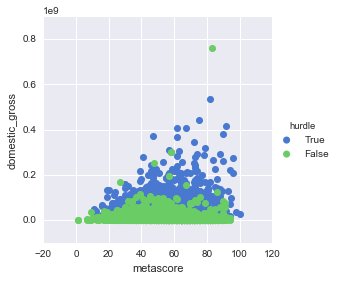

In [164]:
df_cell = df_recent2[['domestic_gross','metascore','hurdle']]
df_cell = df_cell.dropna()
sns.lmplot(x="metascore", y="domestic_gross", hue="hurdle", data=df_cell,
           ci=None, palette="muted", size=4, fit_reg=False,
           scatter_kws={"s": 50, "alpha": 1})

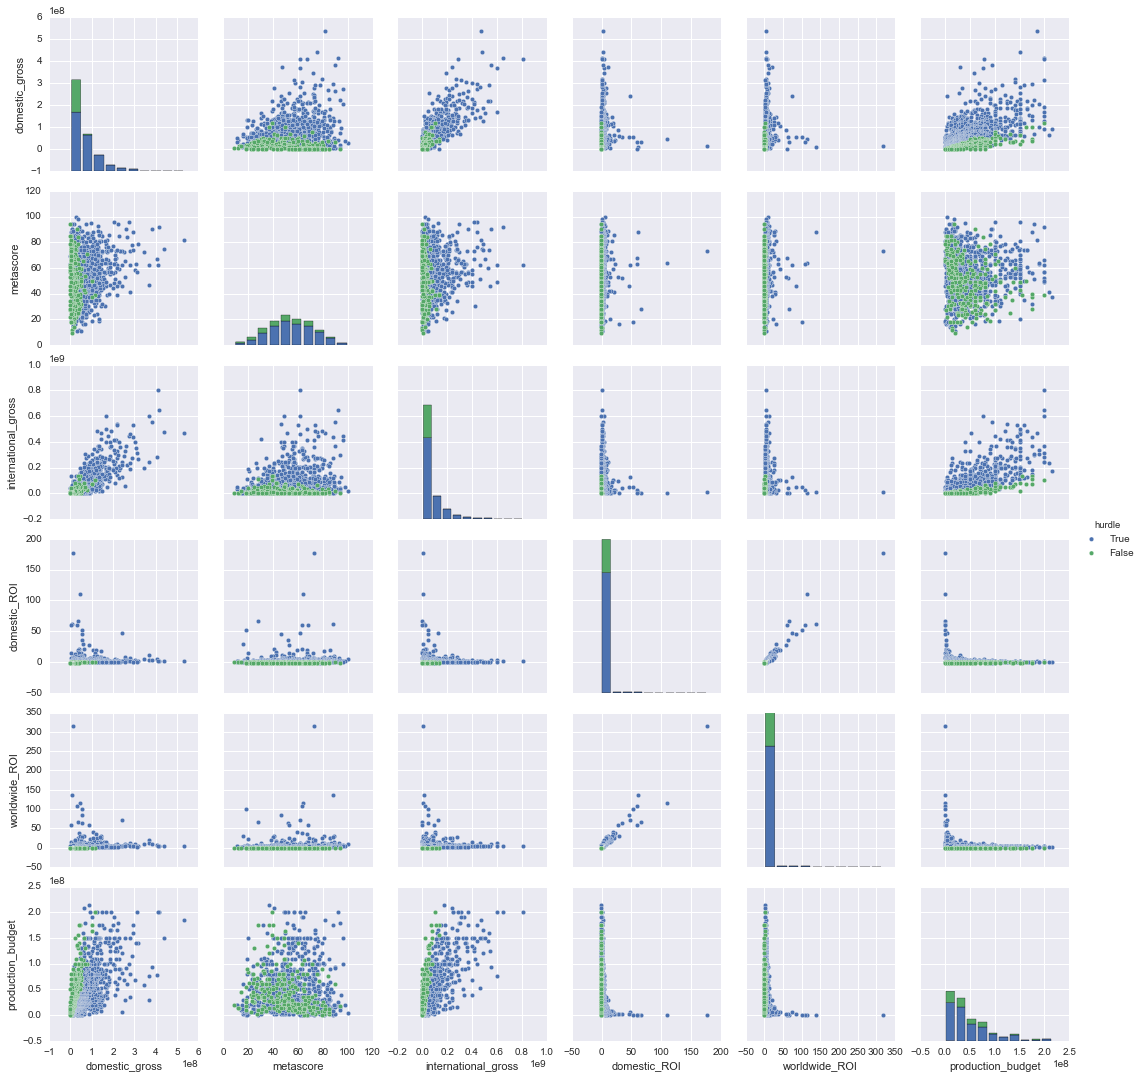

In [84]:
df_margin = df_cell[df_cell.domestic_ROI <= 200]
df_margin = df_margin.sort_values(by='domestic_ROI', ascending = False)
sns.pairplot(df_margin, hue="hurdle")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier 


forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_

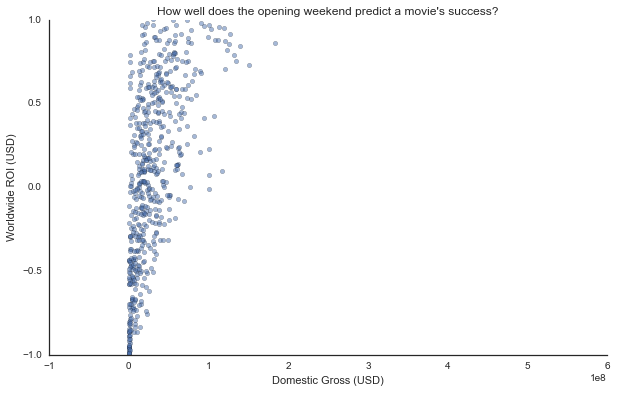

In [123]:
with sns.axes_style('white'):
     plot = df_recent2.plot(kind='scatter', 
                            x='domestic_gross', 
                            y='worldwide_ROI', 
                            alpha=0.5,
                            figsize=(10,6))
     sns.despine()
     plot.set_title("How well does the opening weekend predict a movie's success?")
     plot.set_ylim(-1,1)    
     plot.set_xlabel('Domestic Gross (USD)')
     plot.set_ylabel('Worldwide ROI (USD)')

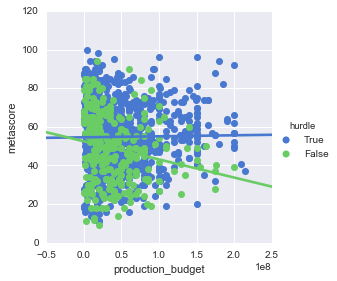

In [86]:
df_cell = df_recent2[['production_budget','metascore','hurdle']]
df_cell = df_cell.dropna()
sns.lmplot(x="production_budget", y="metascore", hue="hurdle", data=df_cell,
           ci=None, palette="muted", size=4,
           scatter_kws={"s": 50, "alpha": 1})

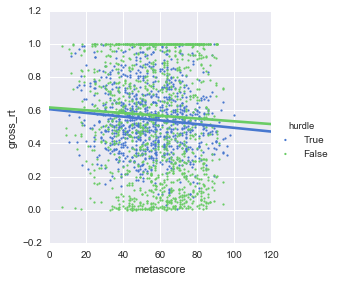

In [154]:
df_cell = df_recent2[['worldw',"metascore",'hurdle']]
df_cell = df_cell.dropna()
sns.lmplot(x="metascore", y="gross_rt", hue='hurdle', data=df_cell,
           ci=None, palette="muted", size=4,
           scatter_kws={"s": 5, "alpha": 1})

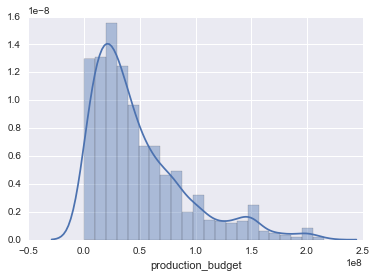

In [117]:
df_cell = df_recent2[['production_budget','hurdle']]
#df_cell = df_cell[df_cell['hurdle']== 'True' & df_cell['production_budget'].notnull()]
df_cell = df_cell[df_cell['hurdle'] == 'True']
sns.distplot(df_cell.production_budget)

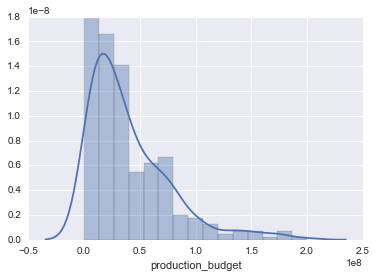

In [120]:
df_cell = df_recent2[['production_budget','hurdle']]
#df_cell = df_cell[df_cell['hurdle']== 'True' & df_cell['production_budget'].notnull()]
df_cell = df_cell[df_cell['hurdle'] == 'False']
df_cell = df_cell.dropna()
sns.distplot(df_cell.production_budget)

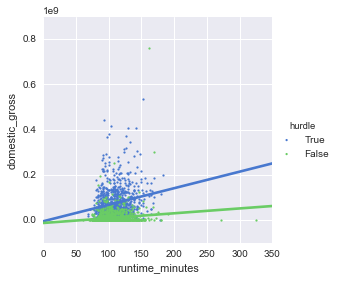

In [141]:
df_cell = df_recent2[['runtime_minutes','domestic_gross','hurdle',"metascore"]]
df_cell = df_cell.dropna()
df_cell.describe()
#df_cell = df_cell[df_cell.worldwide_ROI <= 200]

# sns.lmplot(x="production_budget", y="metascore", hue="hurdle", data=df_cell,
#            ci=None, palette="muted", size=4,
#            scatter_kws={"s": 50, "alpha": 1})


sns.lmplot(x="runtime_minutes", y="domestic_gross", hue="hurdle", data=df_cell,
           ci=None, palette="muted", size=4,
           scatter_kws={"s": 5, "alpha": 1})

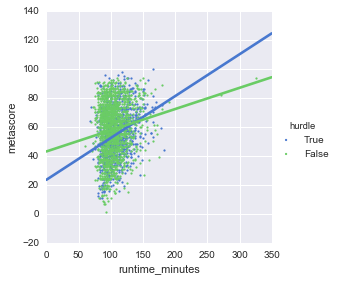

In [142]:
df_cell = df_recent2[['runtime_minutes','domestic_gross','hurdle',"metascore"]]
df_cell = df_cell.dropna()
df_cell.describe()
#df_cell = df_cell[df_cell.worldwide_ROI <= 200]

# sns.lmplot(x="production_budget", y="metascore", hue="hurdle", data=df_cell,
#            ci=None, palette="muted", size=4,
#            scatter_kws={"s": 50, "alpha": 1})


sns.lmplot(x="runtime_minutes", y="metascore", hue="hurdle", data=df_cell,
           ci=None, palette="muted", size=4,
           scatter_kws={"s": 5, "alpha": 1})

In [ ]:
df_cell = df_recent2[['runtime_minutes','domestic_gross','hurdle',"metascore"]]
df_cell = df_cell.dropna()
df_cell.describe()
#df_cell = df_cell[df_cell.worldwide_ROI <= 200]

# sns.lmplot(x="production_budget", y="metascore", hue="hurdle", data=df_cell,
#            ci=None, palette="muted", size=4,
#            scatter_kws={"s": 50, "alpha": 1})


sns.lmplot(x="runtime_minutes", y="metascore", hue="hurdle", data=df_cell,
           ci=None, palette="muted", size=4,
           scatter_kws={"s": 5, "alpha": 1})

ValueError: x and y must be the same size

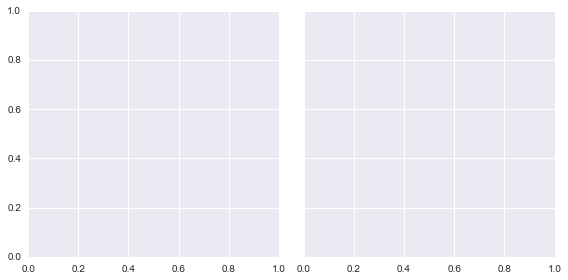

In [138]:
df_cell = df_recent2[['metascore','worldwide_gross','hurdle','metascore']]
df_cell = df_cell.dropna()
df_cell.describe()
sns.lmplot(x="metascore", y="worldwide_gross", col="hurdle", data=df_cell,
           ci=None, palette="muted", size=4,
           scatter_kws={"s": 5, "alpha": 1})

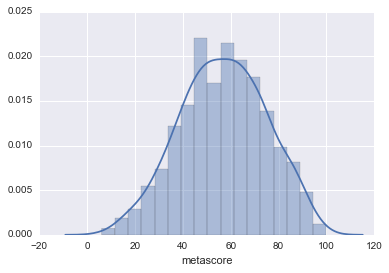

In [124]:
sns.distplot(df_margin[df_margin['domestic_margin']>=.11].metascore)

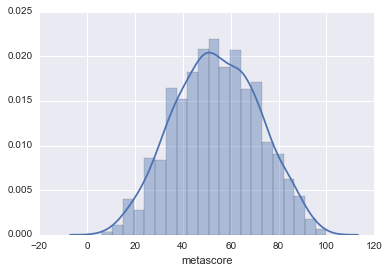

In [116]:
sns.distplot(df_margin[df_margin['domestic_gross']>=0.1].metascore)